In [145]:
import os 
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [6]:
word2vec = {}
print("Loading Word Vector")
with open('glove.6B.50d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        word_vec = np.asarray(values[1:], dtype = 'float32')
        word2vec[word] = word_vec
print("Number of Word Embeddings:", len(word2vec))

Loading Word Vector
Number of Word Embeddings: 400000


In [12]:
train = pd.read_csv("train.csv/train.csv")
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [26]:
labels = list(train)
labels = labels[2:]
sentances = train["comment_text"].fillna("DUMMY_VALUE").values
sentances[0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [106]:
target = train[labels].values
target
max_vocab = 20000

In [107]:
max_seq = max(len(s) for s in sentances)
min_seq = min(len(s) for s in sentances)
s = sorted(len(s) for s in sequences)
median = s[len(s) // 2]
max_seq, min_seq, median

(5000, 6, 35)

In [108]:
#convert string to integers. Returns a dict with words as the key and assingns a value from 1 and increments when a new word is found for every key
tokenizer = Tokenizer(num_words = max_vocab)
tokenizer.fit_on_texts(sentances)
sequences = tokenizer.texts_to_sequences(sentances)

In [109]:
t = tokenizer.word_index
len(t)

210337

In [110]:
data = pad_sequences(sequences, maxlen=100)
print(data.shape)

(159571, 100)


In [124]:
print("Filling pre-trained embedding matrix")
num_words = min(max_vocab, len(t)+1)
embedding_matrix = np.zeros((num_words,50))
for word,idx in t.items():
    if idx<max_vocab:
        embbed = word2vec.get(word)
        if embbed is not None:
            embedding_matrix[idx-1] = embbed
            
embedding_matrix        
    
    

Filling pre-trained embedding matrix


array([[ 0.41800001,  0.24968   , -0.41242   , ..., -0.18411   ,
        -0.11514   , -0.78580999],
       [ 0.68046999, -0.039263  ,  0.30186   , ..., -0.073297  ,
        -0.064699  , -0.26043999],
       [ 0.70853001,  0.57088   , -0.4716    , ..., -0.22562   ,
        -0.093918  , -0.80374998],
       ...,
       [ 0.1178    ,  0.14624   , -0.28240001, ..., -0.19529   ,
        -0.13610999,  1.04270005],
       [-0.64388001, -0.54152   ,  0.10305   , ..., -0.06732   ,
        -0.73308003,  0.88625002],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [120]:
list(t.keys())[0], word2vec.get(list(t.keys())[0])

('the', array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
        -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
         2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
         1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
        -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
        -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
         4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
         7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
        -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
         1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
       dtype=float32))

In [127]:
embedded_layer = Embedding(num_words,50, weights = [embedding_matrix], trainable= False, input_length= 100)

In [142]:
print("Building Model...")
input_ = Input(shape = (100,))
x = embedded_layer(input_)
x = Conv1D(128,3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation = 'relu')(x)
output = Dense(len(labels), activation ='sigmoid')(x)
model = Model(input_,output)
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
print("Train Model...")
r = model.fit(data, target, batch_size = 128, epochs = 10, validation_split = 0.2)
print("Training Done")

Building Model...
Train Model...
Train on 127656 samples, validate on 31915 samples
Epoch 1/10
127656/127656 [==============================] - 73s 570us/step - loss: 0.1259 - accuracy: 0.9642 - val_loss: 0.1040 - val_accuracy: 0.9685
Epoch 2/10
127656/127656 [==============================] - 72s 568us/step - loss: 0.1007 - accuracy: 0.9700 - val_loss: 0.0933 - val_accuracy: 0.9721
Epoch 3/10
127656/127656 [==============================] - 72s 566us/step - loss: 0.0897 - accuracy: 0.9729 - val_loss: 0.1011 - val_accuracy: 0.9678
Epoch 4/10
127656/127656 [==============================] - 73s 573us/step - loss: 0.0839 - accuracy: 0.9742 - val_loss: 0.0863 - val_accuracy: 0.9738
Epoch 5/10
127656/127656 [==============================] - 73s 572us/step - loss: 0.0798 - accuracy: 0.9753 - val_loss: 0.1069 - val_accuracy: 0.9726
Epoch 6/10
127656/127656 [==============================] - 74s 576us/step - loss: 0.0768 - accuracy: 0.9759 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 7/10

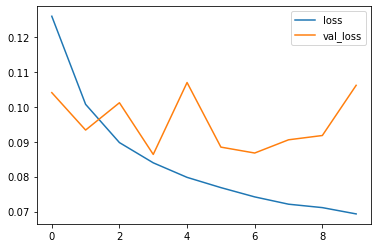

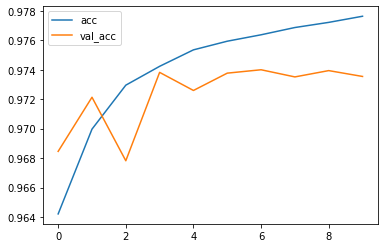

In [144]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [146]:
p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(target[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

0.9488505888586793
